In [ ]:
# Import rockpaperscissors.zip into tmp file

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2021-07-19 14:29:29--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.80MB/s    in 69s     

2021-07-19 14:30:39 (4.49 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Data Diri Peserta Dicoding
# Nama : Raihan Muhammad Syahran
# Umur : 19 Tahun
# Instansi : Universitas Indonesia
# Kelas : Machine Learning Developer

In [ ]:
# file zip extractions
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Remove Unneeded Data
import os
import shutil
if os.path.exists('/tmp/rockpaperscissors/rps-cv-images') : 
  shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images') 
if os.path.exists('/tmp/rockpaperscissors/README_rpc-cv-images.txt'):
  os.remove('/tmp/rockpaperscissors/README_rpc-cv-images.txt')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

total_gen = ImageDataGenerator(
                    validation_split=0.4,   
                    rescale=1./255
                    )
 

train_gen = total_gen
train_gen.horizontal_flip = True
train_gen.fill_mode = 'nearest'
train_gen.brightness_range=[1.0,1.3]
train_gen.zoom_range=[0.5,0.5]

train_generator = train_gen.flow_from_directory(
                    '/tmp/rockpaperscissors',  # direktori data latih
                    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
                    batch_size=8,
                    # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
                    class_mode='categorical',
                    subset = 'training'
                    )


validation_generator = train_gen.flow_from_directory(
                    '/tmp/rockpaperscissors',  # direktori data latih
                    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
                    batch_size=8,
                    # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
                    class_mode='categorical',
                    subset = 'validation')     
            
 


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.constraints import max_norm
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_constraint=max_norm(3), bias_constraint=max_norm(2.)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', bias_constraint=max_norm(3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',kernel_constraint=max_norm(3), bias_constraint=max_norm(2.)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, kernel_constraint=max_norm(3),activation='relu'),
    tf.keras.layers.Dropout(0.24),
    tf.keras.layers.Dense(128, kernel_constraint=max_norm(3),activation='relu'),
    
    
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

In [ ]:

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/tmp/rockpaperscissors',
    save_weights_only=True,
    monitor='val_loss',
    mode='max',
    save_best_only=True)

In [ ]:
# latih model dengan model.fit 

model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=60, 
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,
      callbacks=[model_checkpoint_callback],  
      verbose=1)
model.load_weights('/tmp/rockpaperscissors')

Epoch 1/60
25/25 [==============================] - 13s 480ms/step - loss: 1.0815 - accuracy: 0.4250 - val_loss: 1.1067 - val_accuracy: 0.3500
Epoch 2/60
25/25 [==============================] - 12s 468ms/step - loss: 1.0711 - accuracy: 0.3850 - val_loss: 1.0351 - val_accuracy: 0.4250
Epoch 3/60
25/25 [==============================] - 12s 471ms/step - loss: 0.9930 - accuracy: 0.5700 - val_loss: 0.8591 - val_accuracy: 0.8000
Epoch 4/60
25/25 [==============================] - 12s 465ms/step - loss: 0.8876 - accuracy: 0.6495 - val_loss: 0.6782 - val_accuracy: 0.7000
Epoch 5/60
25/25 [==============================] - 12s 474ms/step - loss: 0.7359 - accuracy: 0.7200 - val_loss: 0.7159 - val_accuracy: 0.7250
Epoch 6/60
25/25 [==============================] - 12s 477ms/step - loss: 0.7049 - accuracy: 0.7050 - val_loss: 0.7114 - val_accuracy: 0.7750
Epoch 7/60
25/25 [==============================] - 12s 469ms/step - loss: 0.6388 - accuracy: 0.8000 - val_loss: 0.6672 - val_accuracy: 0.7500

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


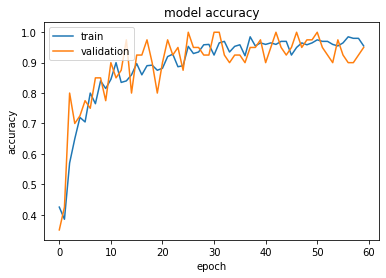

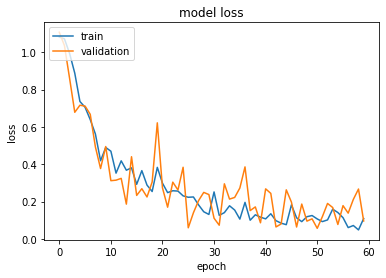

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(model.history.history.keys())  
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Saving 28266775-a1c8-455b-8446-8cdf6ef3dea1.png to 28266775-a1c8-455b-8446-8cdf6ef3dea1 (4).png
2
Scissors


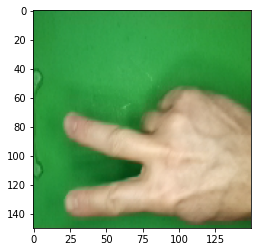

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(output_class)

  if output_class == 0 :
    print('Paper')
  elif output_class == 1 :
    print('Rock')
  else :
    print('Scissors')
